In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xraylib as xrl

In [3]:
import seaborn as sns
sns.set_theme('paper','white',font_scale=1.2)

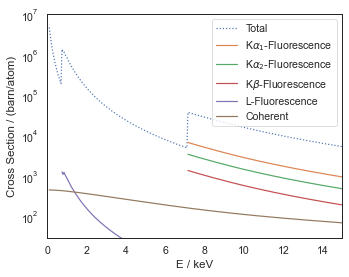

In [5]:
z=xrl.SymbolToAtomicNumber('Fe')
E=np.arange(0.1,25,0.05)
total=np.array([xrl.CSb_Total(z,e) for e in E])
def f(z,line,E):
    ret=[]
    for e in E:
        try:
            ret.append(xrl.CSb_FluorLine(z,line,e))
        except ValueError:
            ret.append(np.nan)
    return np.array(ret)
kfluor=sum(np.nan_to_num(f(z,l,E)) for l in [xrl.KA_LINE,xrl.KB_LINE])
kfluor[kfluor==0]=np.nan

ka1fluor=sum(np.nan_to_num(f(z,l,E)) for l in [xrl.KA1_LINE])
ka1fluor[ka1fluor==0]=np.nan

ka2fluor=sum(np.nan_to_num(f(z,l,E)) for l in [xrl.KA2_LINE])
ka2fluor[ka2fluor==0]=np.nan

kbfluor=sum(np.nan_to_num(f(z,l,E)) for l in [xrl.KB_LINE])
kbfluor[kbfluor==0]=np.nan


lfluor=sum(np.nan_to_num(f(z,l,E)) for l in [xrl.LA_LINE,xrl.LB_LINE])
lfluor[lfluor==0]=np.nan

rayl=np.array([xrl.CSb_Rayl(z,e) for e in E])
compt=np.array([xrl.CSb_Compt(z,e) for e in E])
photo=np.array([xrl.CSb_Photo(z,e) for e in E])

plt.figure(figsize=(5,4))
plt.plot(E,total,':',label='Total')
#plt.plot(E,photo,label='Photoionisation')
#plt.plot(E,kfluor,label='K-Fluorescence')
plt.plot(E,ka1fluor,label=r'K$\alpha_1$-Fluorescence')
plt.plot(E,ka2fluor,label=r'K$\alpha_2$-Fluorescence')
plt.plot(E,kbfluor,label=r'K$\beta$-Fluorescence')




plt.plot(E,lfluor,label='L-Fluorescence')
plt.plot(E,rayl,label='Coherent')
#plt.plot(E,compt,label='Compton')
plt.legend()
plt.yscale('log')
plt.ylim(3e1,1e7)
plt.xlim(0,15)
plt.xlabel('E / keV')
plt.ylabel('Cross Section / (barn/atom)')
plt.tight_layout()
#plt.xscale('log')
plt.savefig('../Tex/images/crosssectionFe.pdf')